# Data Description

Context
Full text of all questions and answers from Stack Overflow that are tagged with the python tag. Useful for natural language processing and community analysis. See also the dataset of R questions.

Content
This dataset is organized as two tables:

- Questions contains the title, body, creation date, score, and owner ID for each Python question.
- Answers contains the body, creation date, score, and owner ID for each of the answers to these questions. The ParentId column links back to the Questions table.

Questions may be deleted by the user who posted them. They can also be closed by community vote, if the question is deemed off-topic for instance. Such questions are not included in this dataset.

#### The dataset contains questions all questions asked between August 2, 2008 and Ocotober 19, 2016.

# Importing Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# This helps in printing the whole column without truncation for longer strings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Reading the data files

In [4]:
questions_df = pd.read_csv("../data/Questions.csv", encoding='latin-1')
answers_df = pd.read_csv("../data/Answers.csv", encoding='latin-1')

In [5]:
questions_df.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from its display name on a Mac?,"<p>I am using the Photoshop's javascript API to find the fonts in a given PSD.</p>\n\n<p>Given a font name returned by the API, I want to find the actual physical font file that that font name corresponds to on the disc.</p>\n\n<p>This is all happening in a python program running on OSX so I guess I'm looking for one of:</p>\n\n<ul>\n<li>Some Photoshop javascript</li>\n<li>A Python function</li>\n<li>An OSX API that I can call from python</li>\n</ul>\n"
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,"<p>I have a cross-platform (Python) application which needs to generate a JPEG preview of the first page of a PDF.</p>\n\n<p>On the Mac I am spawning <a href=""http://developer.apple.com/documentation/Darwin/Reference/ManPages/man1/sips.1.html"">sips</a>. Is there something similarly simple I can do on Windows?</p>\n"
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Codebase,"<p>I'm starting work on a hobby project with a python codebase and would like to set up some form of continuous integration (i.e. running a battery of test-cases each time a check-in is made and sending nag e-mails to responsible persons when the tests fail) similar to CruiseControl or TeamCity.</p>\n\n<p>I realize I could do this with hooks in most VCSes, but that requires that the tests run on the same machine as the version control server, which isn't as elegant as I would like. Does anyone have any suggestions for a small, user-friendly, open-source continuous integration system suitable for a Python codebase?</p>\n"
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a result set. What are the tradeoff of each?</p>\n
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python objects in an array,"<p>I don't remember whether I was dreaming or not but I seem to recall there being a function which allowed something like,</p>\r\n\r\n<pre><code>foo in iter_attr(array of python objects, attribute name)</code></pre>\r\n\r\n<p>I've looked over the docs but this kind of thing doesn't fall under any obvious listed headers</p>"


In [6]:
answers_df.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilities-&gt;Terminal) and type this in:</p>\r\n\r\n<pre><code>locate InsertFontHere<br></code></pre>\r\n\r\n<p>This will spit out every file that has the name you want.</p>\r\n\r\n<p>Warning: there may be alot to wade through.</p>
1,518,153.0,2008-08-02T17:42:28Z,469,2,"<p>I haven't been able to find anything that does this directly. I think you'll have to iterate through the various font folders on the system: <code>/System/Library/Fonts</code>, <code>/Library/Fonts</code>, and there can probably be a user-level directory as well <code>~/Library/Fonts</code>.</p>\n"
2,536,161.0,2008-08-02T18:49:07Z,502,9,"<p>You can use ImageMagick's convert utility for this, see some examples in <a href=""https://web.archive.org/web/20120413111338/http://studio.imagemagick.org/pipermail/magick-users/2002-May/002636.html"" rel=""nofollow"">http://studio.imagemagick.org/pipermail/magick-users/2002-May/002636.html</a>\n:</p>\n\n<blockquote>\n<pre><code>Convert taxes.pdf taxes.jpg \n</code></pre>\n \n <p>Will convert a two page PDF file into [2] jpeg files: taxes.jpg.0,\n taxes.jpg.1</p>\n \n <p>I can also convert these JPEGS to a thumbnail as follows:</p>\n\n<pre><code>convert -size 120x120 taxes.jpg.0 -geometry 120x120 +profile '*' thumbnail.jpg\n</code></pre>\n \n <p>I can even convert the PDF directly to a jpeg thumbnail as follows:</p>\n\n<pre><code>convert -size 120x120 taxes.pdf -geometry 120x120 +profile '*' thumbnail.jpg\n</code></pre>\n \n <p>This will result in a thumbnail.jpg.0 and thumbnail.jpg.1 for the two\n pages.</p>\n</blockquote>\n"
3,538,156.0,2008-08-02T18:56:56Z,535,23,"<p>One possibility is Hudson. It's written in Java, but there's integration with Python projects:</p>\n\n<blockquote>\n <p><a href=""http://redsolo.blogspot.com/2007/11/hudson-embraces-python.html"" rel=""nofollow"">Hudson embraces Python</a></p>\n</blockquote>\n\n<p>I've never tried it myself, however.</p>\n\n<p>(<strong>Update</strong>, Sept. 2011: After a trademark dispute Hudson has been renamed to <a href=""http://jenkins-ci.org/"" rel=""nofollow"">Jenkins</a>.)</p>\n"
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">Buildbot - Trac</a> at work, I haven't used it too much since my code base isn't part of the release cycle yet. But we run the tests on different environments (OSX/Linux/Win) and it sends emails --and it's written in python.</p>"


In [7]:
questions_df.Id.nunique() # There are 607282 unique questions in the dataset

607282

In [8]:
answers_df.ParentId.nunique() # There are 539238 answers in the dataset

539238

The `ParentId` column in the `answers_df` links to the `questions_df` table. That means for example - all `ParentId = 469` in the `answers_df` are the answers to the question with `Id = 469` in the `questions_df`.

The above shows that not all the questions have been answered but some questions might also have more than one answers.
So essentially, there are `607282` unique questions out of which only `539238` have been answered.

In [9]:
# Let's print a sample question and its corresponding answer(s)
sample_question_id = 469 # A sample questions id from the dataset
sample_row = questions_df.loc[questions_df.Id == sample_question_id] # This gets the whole row where Id = 469
sample_row

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from its display name on a Mac?,"<p>I am using the Photoshop's javascript API to find the fonts in a given PSD.</p>\n\n<p>Given a font name returned by the API, I want to find the actual physical font file that that font name corresponds to on the disc.</p>\n\n<p>This is all happening in a python program running on OSX so I guess I'm looking for one of:</p>\n\n<ul>\n<li>Some Photoshop javascript</li>\n<li>A Python function</li>\n<li>An OSX API that I can call from python</li>\n</ul>\n"


In [10]:
sample_row.Title # prints the title of the sample question

0    How can I find the full path to a font from its display name on a Mac?
Name: Title, dtype: object

In [11]:
# Let's print all the answers to this question
answers_df.loc[answers_df.ParentId == sample_question_id] # This prints all the answers to the question with question_id = 469

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilities-&gt;Terminal) and type this in:</p>\r\n\r\n<pre><code>locate InsertFontHere<br></code></pre>\r\n\r\n<p>This will spit out every file that has the name you want.</p>\r\n\r\n<p>Warning: there may be alot to wade through.</p>
1,518,153.0,2008-08-02T17:42:28Z,469,2,"<p>I haven't been able to find anything that does this directly. I think you'll have to iterate through the various font folders on the system: <code>/System/Library/Fonts</code>, <code>/Library/Fonts</code>, and there can probably be a user-level directory as well <code>~/Library/Fonts</code>.</p>\n"
38,3040,457.0,2008-08-06T03:01:23Z,469,12,"<p>Unfortunately the only API that isn't deprecated is located in the ApplicationServices framework, which doesn't have a bridge support file, and thus isn't available in the bridge. If you're wanting to use ctypes, you can use ATSFontGetFileReference after looking up the ATSFontRef.</p>\r\n\r\n<p>Cocoa doesn't have any native support, at least as of 10.5, for getting the location of a font.</p>"
3003,195170,745.0,2008-10-12T07:02:40Z,469,1,"<p>There must be a method in Cocoa to get a list of fonts, then you would have to use the PyObjC bindings to call it..</p>\n\n<p>Depending on what you need them for, you could probably just use something like the following..</p>\n\n<pre><code>import os\ndef get_font_list():\n fonts = []\n for font_path in [""/Library/Fonts"", os.path.expanduser(""~/Library/Fonts"")]:\n if os.path.isdir(font_path):\n fonts.extend(\n [os.path.join(font_path, cur_font) \n for cur_font in os.listdir(font_path)\n ]\n )\n return fonts\n</code></pre>\n"


### Note #1 : The score is the number of upvoted each of these answers got. Maybe I'll be using the answer with maximum upvotes instead of all the answers to reduce training time(Not sure though).

## Checking the number of Questions with no answers

In [12]:
def get_list_of_all_unanswered_questions():
    '''
    Returns a list of question_ids of unanswered questions if ever needed
    '''
    not_answered_questions = []
    list_of_all_questions_ids = questions_df.Id.unique()
    list_of_all_answered_questions = answers_df.ParentId.unique()
    for q_id in list_of_all_questions_ids:
        if q_id not in list_of_all_answered_questions:
            not_answered_questions.append(q_id)
    return not_answered_questions

# list_of_all_unanswered_questions = get_list_of_all_unanswered_questions()
num_of_unanswered_questions = questions_df.Id.nunique() - answers_df.ParentId.nunique() # Prints the number of unanswered questions [This can also be done by questions_df.Id.nunique() - answers_df.ParentId.nunique()]
num_of_unanswered_questions

68044

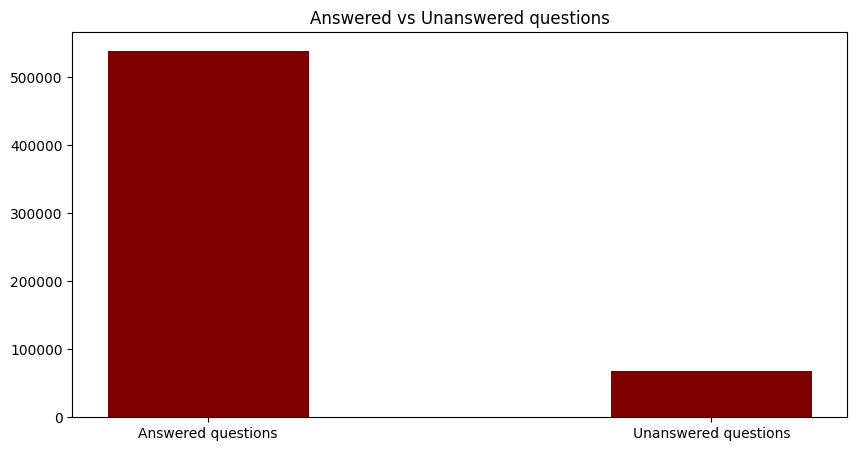

In [13]:
data = {"Answered questions": answers_df.ParentId.nunique(), 
        "Unanswered questions": num_of_unanswered_questions}

desc = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(desc, values, color ='maroon',
        width = 0.4)

plt.title("Answered vs Unanswered questions")
plt.show()

### Note #2 : Hmm... there are `68044` unanswered questions; which is approximately 10% of the questions, these questions with no answers will be dropped from the dataset